In [3]:
library(ggplot2)

In [1]:
GPS1 <- read.csv(file = '/Users/rogerfu/Dropbox/my_classes/EPS_102_2021/Rogers_lectures/linear_regression/walking.csv', stringsAsFactors = FALSE)

In [6]:
GPS1 <- read.csv(file = '/Users/rogerfu/Downloads/NE-2021-02-1609.23.21.csv', stringsAsFactors = FALSE)

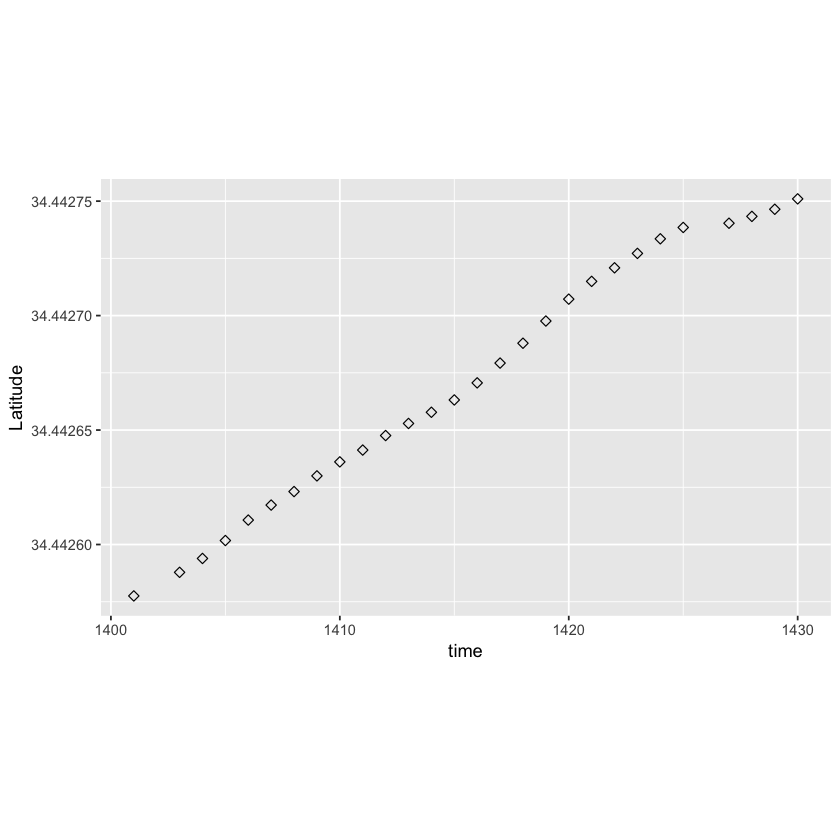

In [14]:
times=vector(mode="numeric", length=nrow(GPS1))
#Convert to seconds on the x axis
for (i in 1:nrow(GPS1)) {
    a = as.numeric(substring(GPS1[i,1], nchar(GPS1[1,1])-8,nchar(GPS1[1,1])-7)) * 60 +
    as.numeric(substring(GPS1[i,1], nchar(GPS1[1,1])-5,nchar(GPS1[1,1])-4))
    times[i]=a
}
df=data.frame(time=times,Latitude=GPS1[2])
ggplot(df, aes(x=time, y=Latitude)) +
  geom_point(size=2, shape=23) + coord_fixed(ratio = 100000)   

In [15]:
df

time,Latitude
1401,34.44258
1403,34.44259
1404,34.44259
1405,34.44260
1406,34.44261
1407,34.44262
1408,34.44262
1409,34.44263
1410,34.44264
1411,34.44264


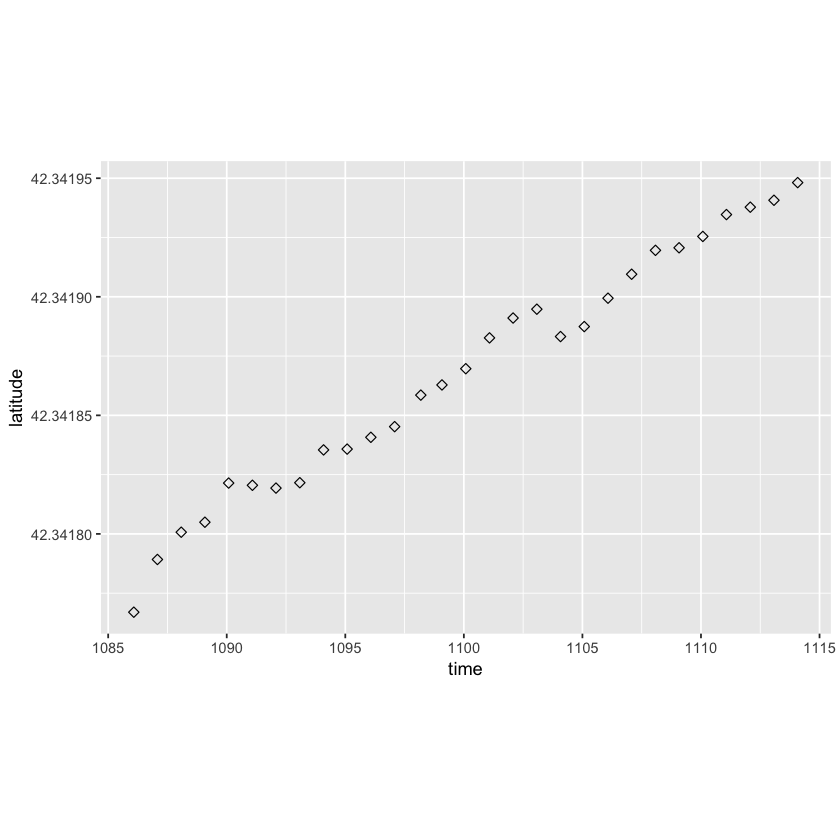

In [4]:
times=vector(mode="numeric", length=nrow(GPS1))
#Convert to seconds on the x axis
for (i in 1:nrow(GPS1)) {
    a = as.numeric(substring(GPS1[i,1], nchar(GPS1[1,1])-9,nchar(GPS1[1,1])-8)) * 60 +
    as.numeric(substring(GPS1[i,1], nchar(GPS1[1,1])-6,nchar(GPS1[1,1])))
    times[i]=a
}
df=data.frame(time=times,latitude=GPS1[2])
ggplot(df, aes(x=time, y=latitude)) +
  geom_point(size=2, shape=23) + coord_fixed(ratio = 100000)   

### Compute linear OLS model

In [10]:
olsmodel=lm(formula=latitude ~ time, data=df)
olsmodel


Call:
lm(formula = latitude ~ time, data = df)

Coefficients:
(Intercept)         time  
  4.234e+01    5.904e-06  


In [11]:
summary(olsmodel)


Call:
lm(formula = latitude ~ time, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.821e-05 -3.477e-06 -2.998e-07  2.976e-06  1.263e-05 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 4.234e+01  1.597e-04 265147.12   <2e-16 ***
time        5.904e-06  1.451e-07     40.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.538e-06 on 27 degrees of freedom
Multiple R-squared:  0.9839,	Adjusted R-squared:  0.9834 
F-statistic:  1655 on 1 and 27 DF,  p-value: < 2.2e-16


### Convert the slope to a velocity in m/s

In [12]:
coefficients(olsmodel)[2]*111000

time 
0.6553576

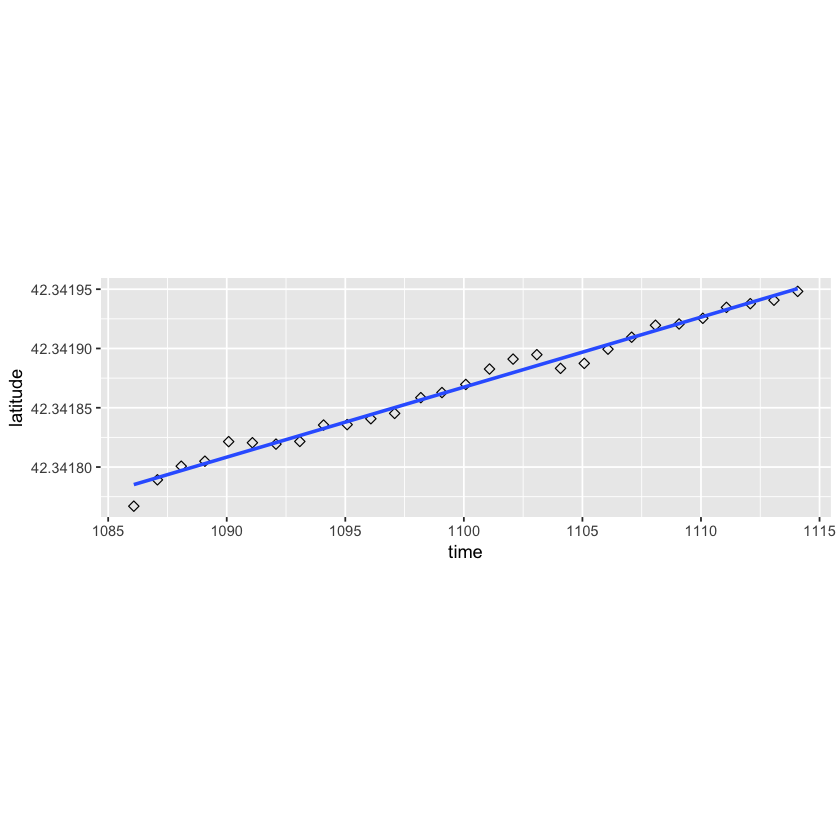

In [13]:
ggplot(df, aes(x=time, y=latitude)) +
  geom_point(size=2, shape=23) + coord_fixed(ratio = 50000)+geom_smooth(method = "lm", se = FALSE)